In [77]:
import importlib
import utils
import plot_utils
import pandas as pd
import matplotlib.pyplot as plt
import constants
import numpy as np

importlib.reload(utils)
importlib.reload(plot_utils)
importlib.reload(constants)


<module 'constants' from 'C:\\Users\\jaimo\\Documents\\GitHub\\visualizing-infrastructure-unfairness\\scripts\\constants.py'>

In [24]:
state_name = 'California'


C:\Users\jaimo\Documents\GitHub\visualizing-infrastructure-unfairness\scripts\utils.py:329: DtypeWarning: Columns (27,35) have mixed types. Specify dtype option on import or set low_memory=False.
  if county_name is not None:


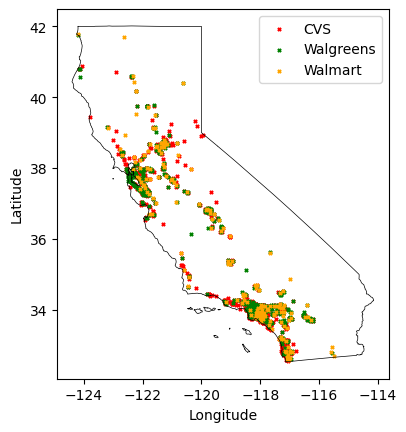

<Figure size 640x480 with 0 Axes>

In [25]:
plot_utils.plot_state_map(state_name)
plot_utils.plot_pharmacies(state_name, which='top3')
plt.show()
plt.clf()


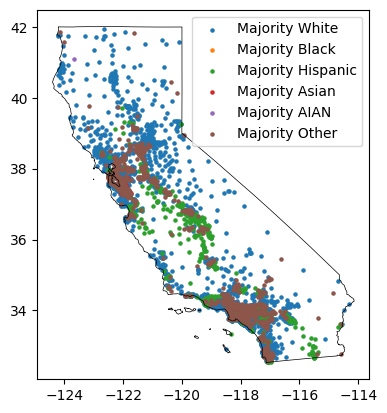

In [52]:
df = utils.get_dataframe(state_name)
races = ['White', 'Black', 'Hispanic', 'Asian', 'AIAN', 'NHPI', 'Other']
all_tracts = {race: [] for race in races}
n = len(df)
for j in range(n):
    if df.iloc[j].pct_NH_Blk_alone_ACS_10_14 >= 50:
        all_tracts['Black'].append(j)
    elif df.iloc[j].pct_NH_White_alone_ACS_10_14 >= 50:
        all_tracts['White'].append(j)
    elif df.iloc[j].pct_Hispanic_ACS_10_14 >= 50:
        all_tracts['Hispanic'].append(j)
    elif df.iloc[j].pct_NH_Asian_alone_ACS_10_14 >= 50:
        all_tracts['Asian'].append(j)
    elif df.iloc[j].pct_NH_AIAN_alone_ACS_10_14 >= 50:
        all_tracts['AIAN'].append(j)
    elif df.iloc[j].pct_NH_NHOPI_alone_ACS_10_14 >= 50:
        all_tracts['NHPI'].append(j)
    else:
        all_tracts['Other'].append(j)
        
plot_utils.plot_state_map(state_name)
        
for race in races:
    if len(all_tracts[race]) > 0:
        longitudes_group = [df.iloc[j].Longitude for j in all_tracts[race]]
        latitudes_group = [df.iloc[j].Latitude for j in all_tracts[race]]
        plt.scatter(longitudes_group, latitudes_group, marker='o', s=5, label='Majority ' + race)
    
plt.legend()


In [71]:
def get_medical_deserts(state_name, n_miles, poverty_threshold=30):
    dataframe = utils.get_dataframe(state_name)
    n = len(dataframe)
    print(n)
    
    latitudes = dataframe['Latitude'].values
    longitudes = dataframe['Longitude'].values
    
    medical_deserts = []
    medical_deserts_by_race = {race: [] for race in races}
    
    k, cvs_pharmacies, walgreens_pharmacies, walmart_pharmacies = utils.get_pharmacy_coordinates(state_name, which='top3')
    pharmacy_coordinates = cvs_pharmacies + walgreens_pharmacies + walmart_pharmacies
    
    for j in range(n):
        # print(j) if j % 10 == 0 else None
        minimum_distance = np.inf
        for i in range(k):
            pharmacy_latitude = pharmacy_coordinates[i][0]
            pharmacy_longitude = pharmacy_coordinates[i][1]
            distance = utils.distance_from_coordinates_2(latitudes[j], longitudes[j], pharmacy_latitude, pharmacy_longitude)
            if distance < minimum_distance:
                minimum_distance = utils.distance_from_coordinates(dataframe.iloc[j].Latitude, dataframe.iloc[j].Longitude, pharmacy_coordinates[i][0], pharmacy_coordinates[i][1])
           
        if minimum_distance > n_miles * constants.miles_to_km and dataframe.iloc[j].pct_Prs_Blw_Pov_Lev_ACS_10_14 >= poverty_threshold:
            medical_deserts.append([longitudes[j], latitudes[j]])
            if df.iloc[j].pct_NH_Blk_alone_ACS_10_14 >= 50:
                medical_deserts_by_race['Black'].append([longitudes[j], latitudes[j]])
            elif df.iloc[j].pct_NH_White_alone_ACS_10_14 >= 50:
                medical_deserts_by_race['White'].append([longitudes[j], latitudes[j]])
            elif df.iloc[j].pct_Hispanic_ACS_10_14 >= 50:
                medical_deserts_by_race['Hispanic'].append([longitudes[j], latitudes[j]])
            elif df.iloc[j].pct_NH_Asian_alone_ACS_10_14 >= 50:
                medical_deserts_by_race['Asian'].append([longitudes[j], latitudes[j]])
            elif df.iloc[j].pct_NH_AIAN_alone_ACS_10_14 >= 50:
                medical_deserts_by_race['AIAN'].append([longitudes[j], latitudes[j]])
            elif df.iloc[j].pct_NH_NHOPI_alone_ACS_10_14 >= 50:
                medical_deserts_by_race['NHPI'].append([longitudes[j], latitudes[j]])
            else:
                medical_deserts_by_race['Other'].append([longitudes[j], latitudes[j]])
                
    return medical_deserts, medical_deserts_by_race

In [72]:
medical_deserts, medical_deserts_by_race = get_medical_deserts(state_name, 5, 30)

7968


C:\Users\jaimo\Documents\GitHub\visualizing-infrastructure-unfairness\scripts\utils.py:348: DtypeWarning: Columns (27,35) have mixed types. Specify dtype option on import or set low_memory=False.
  walgreens_pharmacies = pharmacies_data[pharmacies_data['Pharmacy_Name'].str.contains('WALGREENS')]


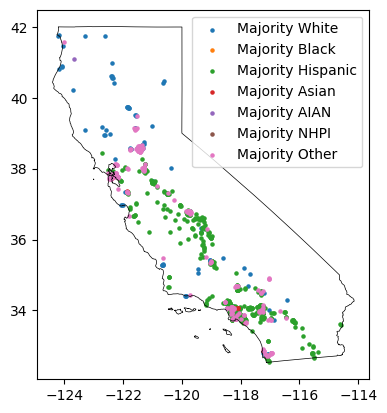

In [78]:
for race in races:
    plt.scatter([x[0] for x in medical_deserts_by_race[race]], [x[1] for x in medical_deserts_by_race[race]], marker='o', s=5, label='Majority ' + race)

plt.legend()

plot_utils.plot_state_map(state_name)

In [79]:
print(len(medical_deserts))

1142


In [81]:
for race in races:
    print(race, len(medical_deserts_by_race[race]))

White 106
Black 15
Hispanic 778
Asian 18
AIAN 1
NHPI 0
Other 224


     STATEFP COUNTYFP  COUNTYNS  GEOID    NAME       NAMELSAD LSAD CLASSFP  \
2027      13      121  01694833  13121  Fulton  Fulton County   06      H1   

      MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND    AWATER     INTPTLAT  \
2027  G4020   122  12060     None        A  1364133162  19666288  +33.7900338   

          INTPTLON                                           geometry  
2027  -084.4681816  POLYGON ((-84.73571 33.62461, -84.73520 33.625...  
Longitudes: array('d', [-84.73571199999999, -84.7352, -84.73523399999999, -84.733834, -84.731534, -84.731134, -84.73003399999999, -84.725234, -84.716734, -84.710534, -84.695134, -84.685833, -84.677133, -84.673941, -84.67353299999999, -84.67156399999999, -84.663336, -84.661508, -84.661433, -84.65643299999999, -84.654607, -84.651933, -84.651933, -84.653733, -84.652733, -84.649033, -84.640833, -84.634939, -84.634833, -84.630533, -84.63006299999999, -84.630033, -84.630117, -84.63218499999999, -84.63227599999999, -84.632266, -84.632323

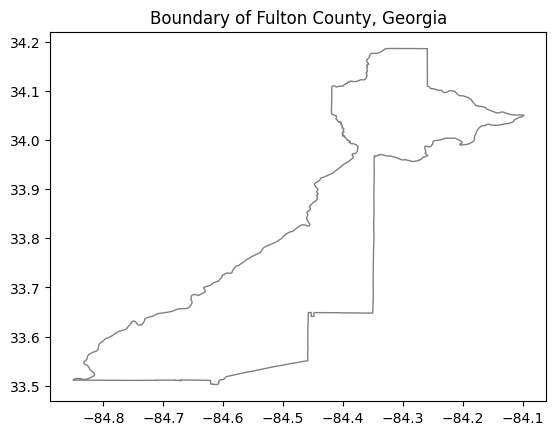

In [11]:
state_data = {
    "Alabama": {"Postal Abbr.": "AL", "FIPS Code": "01"},
    "Alaska": {"Postal Abbr.": "AK", "FIPS Code": "02"},
    "Arizona": {"Postal Abbr.": "AZ", "FIPS Code": "04"},
    "Arkansas": {"Postal Abbr.": "AR", "FIPS Code": "05"},
    "California": {"Postal Abbr.": "CA", "FIPS Code": "06"},
    "Colorado": {"Postal Abbr.": "CO", "FIPS Code": "08"},
    "Connecticut": {"Postal Abbr.": "CT", "FIPS Code": "09"},
    "Delaware": {"Postal Abbr.": "DE", "FIPS Code": "10"},
    "District of Columbia": {"Postal Abbr.": "DC", "FIPS Code": "11"},
    "Florida": {"Postal Abbr.": "FL", "FIPS Code": "12"},
    "Georgia": {"Postal Abbr.": "GA", "FIPS Code": "13"},
    "Hawaii": {"Postal Abbr.": "HI", "FIPS Code": "15"},
    "Idaho": {"Postal Abbr.": "ID", "FIPS Code": "16"},
    "Illinois": {"Postal Abbr.": "IL", "FIPS Code": "17"},
    "Indiana": {"Postal Abbr.": "IN", "FIPS Code": "18"},
    "Iowa": {"Postal Abbr.": "IA", "FIPS Code": "19"},
    "Kansas": {"Postal Abbr.": "KS", "FIPS Code": "20"},
    "Kentucky": {"Postal Abbr.": "KY", "FIPS Code": "21"},
    "Louisiana": {"Postal Abbr.": "LA", "FIPS Code": "22"},
    "Maine": {"Postal Abbr.": "ME", "FIPS Code": "23"},
    "Maryland": {"Postal Abbr.": "MD", "FIPS Code": "24"},
    "Massachusetts": {"Postal Abbr.": "MA", "FIPS Code": "25"},
    "Michigan": {"Postal Abbr.": "MI", "FIPS Code": "26"},
    "Minnesota": {"Postal Abbr.": "MN", "FIPS Code": "27"},
    "Mississippi": {"Postal Abbr.": "MS", "FIPS Code": "28"},
    "Missouri": {"Postal Abbr.": "MO", "FIPS Code": "29"},
    "Montana": {"Postal Abbr.": "MT", "FIPS Code": "30"},
    "Nebraska": {"Postal Abbr.": "NE", "FIPS Code": "31"},
    "Nevada": {"Postal Abbr.": "NV", "FIPS Code": "32"},
    "New Hampshire": {"Postal Abbr.": "NH", "FIPS Code": "33"},
    "New Jersey": {"Postal Abbr.": "NJ", "FIPS Code": "34"},
    "New Mexico": {"Postal Abbr.": "NM", "FIPS Code": "35"},
    "New York": {"Postal Abbr.": "NY", "FIPS Code": "36"},
    "North Carolina": {"Postal Abbr.": "NC", "FIPS Code": "37"},
    "North Dakota": {"Postal Abbr.": "ND", "FIPS Code": "38"},
    "Ohio": {"Postal Abbr.": "OH", "FIPS Code": "39"},
    "Oklahoma": {"Postal Abbr.": "OK", "FIPS Code": "40"},
    "Oregon": {"Postal Abbr.": "OR", "FIPS Code": "41"},
    "Pennsylvania": {"Postal Abbr.": "PA", "FIPS Code": "42"},
    "Puerto Rico": {"Postal Abbr.": "PR", "FIPS Code": "72"},
    "Rhode Island": {"Postal Abbr.": "RI", "FIPS Code": "44"},
    "South Carolina": {"Postal Abbr.": "SC", "FIPS Code": "45"},
    "South Dakota": {"Postal Abbr.": "SD", "FIPS Code": "46"},
    "Tennessee": {"Postal Abbr.": "TN", "FIPS Code": "47"},
    "Texas": {"Postal Abbr.": "TX", "FIPS Code": "48"},
    "Utah": {"Postal Abbr.": "UT", "FIPS Code": "49"},
    "Vermont": {"Postal Abbr.": "VT", "FIPS Code": "50"},
    "Virginia": {"Postal Abbr.": "VA", "FIPS Code": "51"},
    "Virgin Islands": {"Postal Abbr.": "VI", "FIPS Code": "78"},
    "Washington": {"Postal Abbr.": "WA", "FIPS Code": "53"},
    "West Virginia": {"Postal Abbr.": "WV", "FIPS Code": "54"},
    "Wisconsin": {"Postal Abbr.": "WI", "FIPS Code": "55"},
    "Wyoming": {"Postal Abbr.": "WY", "FIPS Code": "56"}
}






# 1. Load the US county boundaries dataset
url = "https://www2.census.gov/geo/tiger/TIGER2020/COUNTY/tl_2020_us_county.zip"  # Latest county boundaries dataset
r = requests.get(url)
with open("tl_2020_us_county.zip", "wb") as f:
    f.write(r.content)
counties = gpd.read_file("tl_2020_us_county.zip")

# 2. Specify the desired county
county_name = "Fulton County"  # Replace with the actual county name
state_name = "Georgia"  # Replace with the state name if needed
state_fp = state_data[state_name]["FIPS Code"]

# 3. Filter the county using name and optionally state
county = counties[(counties["NAMELSAD"] == county_name) & (counties["STATEFP"] == state_fp)]

# 4. Access the boundary coordinates
boundary_coordinates = county.geometry.iloc[0].exterior.coords.xy

# 6. Optional: Visualize the boundary on a map
import matplotlib.pyplot as plt

plt.plot(boundary_coordinates[0], boundary_coordinates[1], linewidth=1, color='gray')

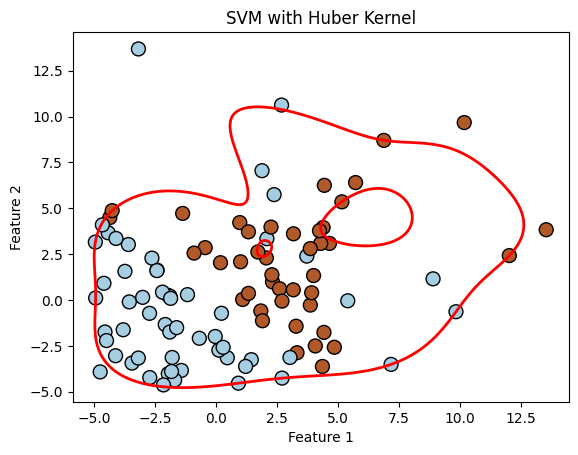

In [2]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scripts.utils as utils
import scripts.plot_utils as plot_utils
import scripts.constants as constants
import geopandas as gpd
import requests
import shapely

st.set_page_config(layout="wide")


# ToDo: move to constant.py
state_data = {
    "Alabama": {"Postal Abbr.": "AL", "FIPS Code": "01"},
    "Alaska": {"Postal Abbr.": "AK", "FIPS Code": "02"},
    "Arizona": {"Postal Abbr.": "AZ", "FIPS Code": "04"},
    "Arkansas": {"Postal Abbr.": "AR", "FIPS Code": "05"},
    "California": {"Postal Abbr.": "CA", "FIPS Code": "06"},
    "Colorado": {"Postal Abbr.": "CO", "FIPS Code": "08"},
    "Connecticut": {"Postal Abbr.": "CT", "FIPS Code": "09"},
    "Delaware": {"Postal Abbr.": "DE", "FIPS Code": "10"},
    "District of Columbia": {"Postal Abbr.": "DC", "FIPS Code": "11"},
    "Florida": {"Postal Abbr.": "FL", "FIPS Code": "12"},
    "Georgia": {"Postal Abbr.": "GA", "FIPS Code": "13"},
    "Hawaii": {"Postal Abbr.": "HI", "FIPS Code": "15"},
    "Idaho": {"Postal Abbr.": "ID", "FIPS Code": "16"},
    "Illinois": {"Postal Abbr.": "IL", "FIPS Code": "17"},
    "Indiana": {"Postal Abbr.": "IN", "FIPS Code": "18"},
    "Iowa": {"Postal Abbr.": "IA", "FIPS Code": "19"},
    "Kansas": {"Postal Abbr.": "KS", "FIPS Code": "20"},
    "Kentucky": {"Postal Abbr.": "KY", "FIPS Code": "21"},
    "Louisiana": {"Postal Abbr.": "LA", "FIPS Code": "22"},
    "Maine": {"Postal Abbr.": "ME", "FIPS Code": "23"},
    "Maryland": {"Postal Abbr.": "MD", "FIPS Code": "24"},
    "Massachusetts": {"Postal Abbr.": "MA", "FIPS Code": "25"},
    "Michigan": {"Postal Abbr.": "MI", "FIPS Code": "26"},
    "Minnesota": {"Postal Abbr.": "MN", "FIPS Code": "27"},
    "Mississippi": {"Postal Abbr.": "MS", "FIPS Code": "28"},
    "Missouri": {"Postal Abbr.": "MO", "FIPS Code": "29"},
    "Montana": {"Postal Abbr.": "MT", "FIPS Code": "30"},
    "Nebraska": {"Postal Abbr.": "NE", "FIPS Code": "31"},
    "Nevada": {"Postal Abbr.": "NV", "FIPS Code": "32"},
    "New Hampshire": {"Postal Abbr.": "NH", "FIPS Code": "33"},
    "New Jersey": {"Postal Abbr.": "NJ", "FIPS Code": "34"},
    "New Mexico": {"Postal Abbr.": "NM", "FIPS Code": "35"},
    "New York": {"Postal Abbr.": "NY", "FIPS Code": "36"},
    "North Carolina": {"Postal Abbr.": "NC", "FIPS Code": "37"},
    "North Dakota": {"Postal Abbr.": "ND", "FIPS Code": "38"},
    "Ohio": {"Postal Abbr.": "OH", "FIPS Code": "39"},
    "Oklahoma": {"Postal Abbr.": "OK", "FIPS Code": "40"},
    "Oregon": {"Postal Abbr.": "OR", "FIPS Code": "41"},
    "Pennsylvania": {"Postal Abbr.": "PA", "FIPS Code": "42"},
    "Puerto Rico": {"Postal Abbr.": "PR", "FIPS Code": "72"},
    "Rhode Island": {"Postal Abbr.": "RI", "FIPS Code": "44"},
    "South Carolina": {"Postal Abbr.": "SC", "FIPS Code": "45"},
    "South Dakota": {"Postal Abbr.": "SD", "FIPS Code": "46"},
    "Tennessee": {"Postal Abbr.": "TN", "FIPS Code": "47"},
    "Texas": {"Postal Abbr.": "TX", "FIPS Code": "48"},
    "Utah": {"Postal Abbr.": "UT", "FIPS Code": "49"},
    "Vermont": {"Postal Abbr.": "VT", "FIPS Code": "50"},
    "Virginia": {"Postal Abbr.": "VA", "FIPS Code": "51"},
    "Virgin Islands": {"Postal Abbr.": "VI", "FIPS Code": "78"},
    "Washington": {"Postal Abbr.": "WA", "FIPS Code": "53"},
    "West Virginia": {"Postal Abbr.": "WV", "FIPS Code": "54"},
    "Wisconsin": {"Postal Abbr.": "WI", "FIPS Code": "55"},
    "Wyoming": {"Postal Abbr.": "WY", "FIPS Code": "56"}
}
races = ['White', 'Black', 'Hispanic', 'Asian', 'AIAN', 'NHPI', 'Other']

st.sidebar.write(r'A Census tract is designated poor where more than $p$% of the population is below the poverty level.')

st.sidebar.text_input('Enter US state name:', key='state_name', value='Georgia')
st.sidebar.text_input('Enter US county name:', key='county_name', value='Fulton')
state_name = st.session_state['state_name']
county_name = st.session_state['county_name']
state_abbrv = state_data[state_name]["Postal Abbr."]
if not county_name.endswith(' County'):
    county_name += ' County'
st.title('Racial Segregation in :orange[' + county_name + '], ' + state_abbrv + ', USA')


st.sidebar.slider('Choose poverty threshold $p$%', key='poverty_threshold', min_value=0, max_value=100, value=30)
# st.sidebar.slider('No insurance threshold (%)', key='no_insurance_threshold', min_value=0, max_value=100, value=25)
# st.sidebar.slider('Two or more insurance threshold (%)', key='two_or_more_insurance_threshold', min_value=0, max_value=100, value=25)
poverty_threshold = st.session_state['poverty_threshold']
# no_insurance_threshold = st.session_state['no_insurance_threshold']
# two_or_more_insurance_threshold = st.session_state['two_or_more_insurance_threshold']

st.sidebar.write(':orange[Currently unoptimized and may take a few seconds to load. Preliminary results only.]')


@st.cache_data
def get_county_data(county_name='Fulton', state_name='Georgia'):
    url = "https://www2.census.gov/geo/tiger/TIGER2020/COUNTY/tl_2020_us_county.zip"  # Latest county boundaries dataset
    r = requests.get(url)
    with open("tl_2020_us_county.zip", "wb") as f:
        f.write(r.content)
    counties = gpd.read_file("tl_2020_us_county.zip")

    if not county_name.endswith(' County'):
        county_name += ' County'
    if not state_name in state_data:
        st.write(':red[' + state_name + ' not found.]')
        st.stop()
    state_fp = state_data[state_name]["FIPS Code"]

    # 3. Filter the county using name and optionally state
    county = counties[(counties["NAMELSAD"] == county_name) & (counties["STATEFP"] == state_fp)]

    boundary_coordinates = []
    if type(county.geometry.iloc[0]) == shapely.geometry.multipolygon.MultiPolygon:
        length = len(county.geometry.iloc[0].geoms)
        for polygon in county.geometry.iloc[0].geoms:
            # st.write(type(polygon))
            boundary_coordinates = boundary_coordinates + [polygon.exterior.coords.xy]
            # st.write(polygon.centroid)
    else:
        length = 1
        boundary_coordinates = county.geometry.iloc[0].exterior.coords.xy
    # 4. Access the boundary coordinates
    return length, boundary_coordinates


length, boundary_coordinates = get_county_data(county_name, state_name)
df = utils.get_dataframe(state_name, county_name)
if df is None:
    st.sidebar.write(':red[' + county_name + ' not found.]')
    st.stop()


df = utils.get_dataframe(state_name, county_name)


def plot_census_tracts_by_race(state_name, county_name):
    all_tracts = {race: [] for race in races}
    n = len(df)
    for j in range(n):
        if df.iloc[j].pct_NH_Blk_alone_ACS_10_14 >= 50:
            all_tracts['Black'].append(j)
        elif df.iloc[j].pct_NH_White_alone_ACS_10_14 >= 50:
            all_tracts['White'].append(j)
        elif df.iloc[j].pct_Hispanic_ACS_10_14 >= 50:
            all_tracts['Hispanic'].append(j)
        elif df.iloc[j].pct_NH_Asian_alone_ACS_10_14 >= 50:
            all_tracts['Asian'].append(j)
        elif df.iloc[j].pct_NH_AIAN_alone_ACS_10_14 >= 50:
            all_tracts['AIAN'].append(j)
        elif df.iloc[j].pct_NH_NHOPI_alone_ACS_10_14 >= 50:
            all_tracts['NHPI'].append(j)
        else:
            all_tracts['Other'].append(j)

    for race in races:
        if len(all_tracts[race]) > 0:
            longitudes_group = [df.iloc[j].Longitude for j in all_tracts[race]]
            latitudes_group = [df.iloc[j].Latitude for j in all_tracts[race]]
            plt.scatter(longitudes_group, latitudes_group, marker='o', s=7, label='Majority ' + race)

    plt.legend(loc='best')
    plt.axis('off')
    plt.title('Census tracts in ' + county_name + ', ' + state_name + ', USA \n colored by racial majority')
    ax.set_aspect(constants.aspect_ratio)

    return n, all_tracts


def plot_census_tracts_by_poverty_levels(state_name, county_name, poverty_threshold):
    poverty_levels = ['Below ' + str(poverty_threshold) + '%', 'Above ' + str(poverty_threshold) + '%']
    all_tracts = {level: [] for level in poverty_levels}
    n = len(df)
    for j in range(n):
        if df.iloc[j].pct_Prs_Blw_Pov_Lev_ACS_10_14 < poverty_threshold:
            all_tracts['Below ' + str(poverty_threshold) + '%'].append(j)
        else:
            all_tracts['Above ' + str(poverty_threshold) + '%'].append(j)

    colors = ['olive', 'brown']
    shapes = ['s', 'P']

    for level in poverty_levels:
        if len(all_tracts[level]) > 0:
            longitudes_group = [df.iloc[j].Longitude for j in all_tracts[level]]
            latitudes_group = [df.iloc[j].Latitude for j in all_tracts[level]]
            plt.scatter(longitudes_group, latitudes_group, s=7, label=level, marker=shapes[poverty_levels.index(level)],
                        facecolors='none', color=colors[poverty_levels.index(level)], alpha=0.9)

                        # color=colors[poverty_levels.index(level)])


    plt.legend(loc='best')
    plt.axis('off')
    plt.title('Census tracts in ' + county_name + ', ' + state_name + ', USA \n by poverty level')
    ax.set_aspect(constants.aspect_ratio)

    return n, all_tracts


left_column, middle_column = st.columns(2)


with left_column:
    fig, ax = plt.subplots()
    ax.set_aspect(constants.aspect_ratio)
    if length == 1:
        plt.plot(boundary_coordinates[0], boundary_coordinates[1], linewidth=1, color='gray')
    else:
        for i in range(length):
            plt.plot(boundary_coordinates[i][0], boundary_coordinates[i][1], linewidth=1, color='gray')
    n, tracts_by_race = plot_census_tracts_by_race(state_name, county_name)
    plt.axis('off')
    st.pyplot(fig, dpi=600, transparent=True, bbox_inches='tight', clear_figure=True)

with middle_column:
    fig, ax = plt.subplots()
    ax.set_aspect(constants.aspect_ratio)
    if length == 1:
        plt.plot(boundary_coordinates[0], boundary_coordinates[1], linewidth=1, color='gray')
    else:
        for i in range(length):
            plt.plot(boundary_coordinates[i][0], boundary_coordinates[i][1], linewidth=1, color='gray')
    _, tracts_by_poverty = plot_census_tracts_by_poverty_levels(state_name, county_name, poverty_threshold)
    plt.axis('off')
    st.pyplot(fig, dpi=600, transparent=True, bbox_inches='tight', clear_figure=True)


racial_poverty_tracts = {race: [] for race in races}


if len(tracts_by_poverty['Above ' + str(poverty_threshold) + '%']) != 0:
    for race in races:
        for j in tracts_by_race[race]:
            if df.iloc[j].pct_Prs_Blw_Pov_Lev_ACS_10_14 >= poverty_threshold:
                racial_poverty_tracts[race].append([df.iloc[j].Longitude, df.iloc[j].Latitude])

        fraction_of_tracts = len(tracts_by_race[race])/n
        fraction_of_poor_tracts = len(racial_poverty_tracts[race])/len(tracts_by_poverty['Above ' + str(poverty_threshold) + '%'])
        percentage_of_tracts = int(fraction_of_tracts * 100)
        percentage_of_poor_tracts = int(fraction_of_poor_tracts * 100)

        if race != 'Other' and fraction_of_poor_tracts - fraction_of_tracts >= 0.10:
            st.write(race + ' population may be disproportionately affected by poverty in ' + county_name + ', ' + state_name + ', USA. '
                     ':red[' + str(percentage_of_poor_tracts) + '%] of poor Census tracts in ' + county_name + ' are Majority ' + race + '. '
                     'Only :blue[' + str(percentage_of_tracts) + '%] of all Census tracts in ' + county_name + ' are Majority ' + race + '.'
                     )


# st.write('Based on code by Michael Wang, Hassan Mortagy, Swati Gupta, and Jai Moondra.')


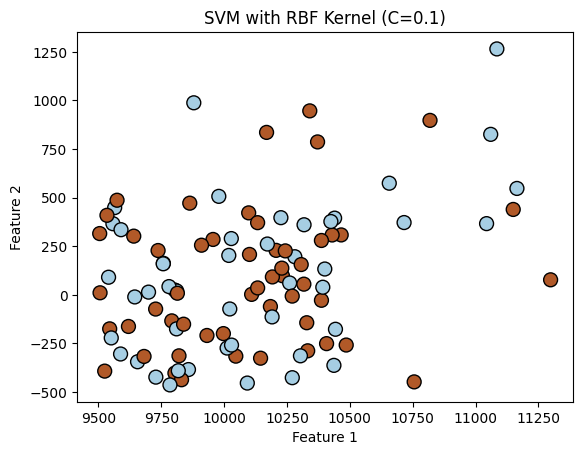

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate some example data
np.random.seed(42)
X = np.random.rand(100, 2) * 1000 - 500  # Random 2D points between -5 and 5
# for i in range(100):
#     X[i][0] += 10000
    
# y = np.sign(X[:, 0] + X[:, 1])  # Create labels (+1 if x + y is positive, -1 otherwise)
y = np.random.randint(0, 2, 100) * 2 - 1

# Add outliers
X[::5] += np.random.rand(20, 2) * 1000  # Add outliers to every 5th point

# Create an SVM model with an RBF kernel and C=0.1
model = svm.SVC(kernel='rbf', gamma='scale')  # 'scale' is used for automatic gamma calculation based on 1 / (n_features * X.var())

# Fit the model
model.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=100)
plt.title('SVM with RBF Kernel (C=0.1)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500), np.linspace(ylim[0], ylim[1], 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')

plt.show()


7/7 [==============================] - 0s 3ms/step
Accuracy: 0.33
93/93 [==============================] - 0s 4ms/step


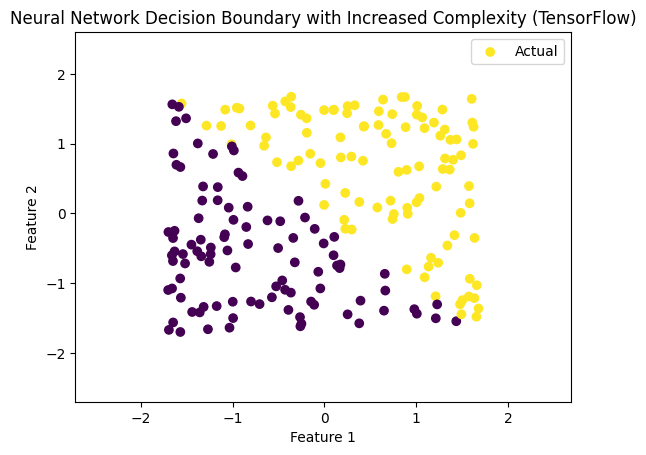

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generate random 2D data for demonstration
np.random.seed(0)
X = np.random.rand(1000, 2) * 10  # 100 points in 2D space
y = (X[:, 0] + X[:, 1] > 10).astype(int) * 2 - 1  # Binary classification based on a simple condition

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to TensorFlow tensors
X_train_tensor = tf.constant(X_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)

# Define a neural network model with increased complexity
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_dim=X.shape[1]),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tensor, y_train_tensor, epochs=100, batch_size=8, verbose=0)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Transform the meshgrid and normalize
X_meshgrid = np.c_[xx.ravel(), yy.ravel()]
X_meshgrid = scaler.transform(X_meshgrid)
X_meshgrid_tensor = tf.constant(X_meshgrid, dtype=tf.float32)

# Predictions on the meshgrid
Z = model.predict(X_meshgrid_tensor)
Z = (Z > 0.5).astype(int).reshape(xx.shape)

# Plot the decision boundary as a solid contour line
plt.contour(xx, yy, Z, colors='black', linestyles='solid')

# Scatter plot for the data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='Actual')
plt.title('Neural Network Decision Boundary with Increased Complexity (TensorFlow)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Accuracy: 0.98


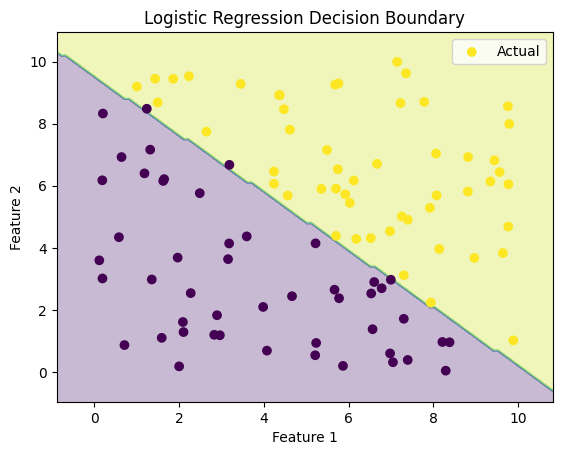

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate random 2D data for demonstration
np.random.seed(0)
X = np.random.rand(100, 2) * 10  # 100 points in 2D space
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Binary classification based on a simple condition

# Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Predictions on the entire dataset
y_pred = model.predict(X)

# Calculate accuracy on the entire dataset
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', label='Actual')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


1/1 [==============================] - 0s 104ms/step
Accuracy: 0.65
443/443 [==============================] - 1s 3ms/step


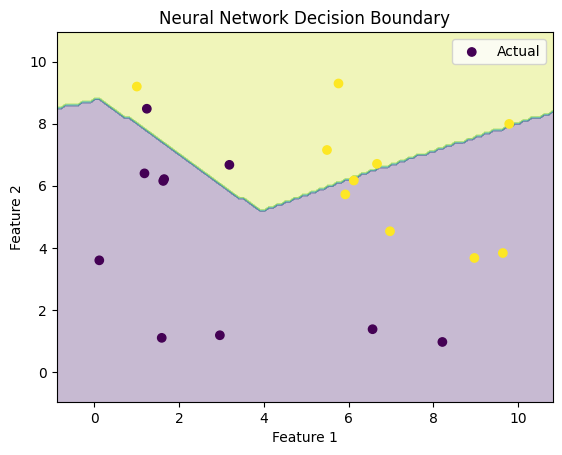

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate random 2D data for demonstration
np.random.seed(0)
X = np.random.rand(100, 2) * 10  # 100 points in 2D space
y = (X[:, 0] + X[:, 1] > 10).astype(int) * 2 - 1  # Binary classification based on a simple condition

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential()
model.add(Dense(units=8, input_dim=2, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, -1)  # Convert probabilities to class labels

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Transform the meshgrid to match the neural network input
X_meshgrid = np.c_[xx.ravel(), yy.ravel()]

# Predictions on the meshgrid
Z = model.predict(X_meshgrid)
Z = (Z > 0.5).astype(int).reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='Actual')
plt.title('Neural Network Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


1/1 [==============================] - 0s 69ms/step
Accuracy: 0.30
443/443 [==============================] - 1s 1ms/step


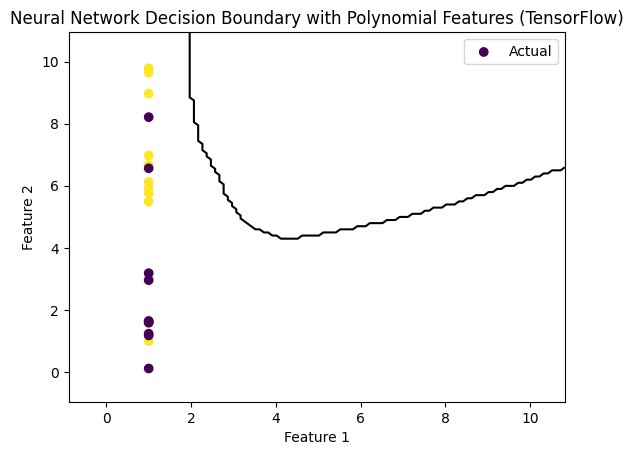

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

# Generate random 2D data for demonstration
np.random.seed(0)
X = np.random.rand(100, 2) * 10  # 100 points in 2D space
y = (X[:, 0] + X[:, 1] > 10).astype(int) * 2 - 1  # Binary classification based on a simple condition

# Apply polynomial features
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Convert data to TensorFlow tensors
X_train_tensor = tf.constant(X_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)

# Define a neural network model with more layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_dim=X_poly.shape[1]),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tensor, y_train_tensor, epochs=100, batch_size=8, verbose=0)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Transform the meshgrid to match the polynomial feature space
xx_poly = poly.transform(np.c_[xx.ravel(), yy.ravel()])
X_meshgrid_tensor = tf.constant(xx_poly, dtype=tf.float32)

# Predictions on the meshgrid
Z = model.predict(X_meshgrid_tensor)
Z = (Z > 0.5).astype(int).reshape(xx.shape)

# Plot the decision boundary as a solid contour line
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='solid')

# Scatter plot for the data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='Actual')
plt.title('Neural Network Decision Boundary with Polynomial Features (TensorFlow)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import accuracy_score

# Generate random 2D data for demonstration
np.random.seed(0)
X = np.random.rand(100, 2) * 10  # 100 points in 2D space
y = (X[:, 0] + X[:, 1] > 10).astype(int) * 2 - 1  # Binary classification based on a simple condition

# Apply polynomial features
degree = 1
poly = PolynomialFeatures(degree=degree)
# X_poly = poly.fit_transform(X)

# Normalize the features
scaler = StandardScaler()
# X_poly = scaler.fit_transform(X_poly)
X_poly = X

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.4, random_state=42)

print(X_train.shape)
print(X_train, X_test)

# Convert data to TensorFlow tensors
X_train_tensor = tf.constant(X_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)

# Define a neural network model with more layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_dim=X_poly.shape[1]),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tensor, y_train_tensor, epochs=100, batch_size=8, verbose=0)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Transform the meshgrid to match the polynomial feature space and normalize
#xx_poly = poly.transform(np.c_[xx.ravel(), yy.ravel()])
# xx_poly = scaler.transform(xx_poly)
X_meshgrid_tensor = tf.constant(xx_poly, dtype=tf.float32)

# Predictions on the meshgrid
Z = model.predict(X_meshgrid_tensor)
Z = (Z > 0.5).astype(int).reshape(xx.shape)

# Plot the decision boundary as a solid contour line
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='solid')

# Scatter plot for the data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='Actual')
plt.title('Neural Network Decision Boundary with Polynomial Features (TensorFlow)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


(60, 3)
[[ 0.          1.11862309 -1.68842161]
 [ 0.          1.1506041  -1.36838143]
 [ 0.         -1.57308793 -1.39978606]
 [ 0.         -0.41108388 -0.97011105]
 [ 0.         -1.08354395 -1.14004985]
 [ 0.          1.52636616  0.68247776]
 [ 0.          0.73902092  1.32870719]
 [ 0.          0.19969127 -0.16913371]
 [ 0.         -0.32004427  0.41837574]
 [ 0.         -1.31625185  1.60282154]
 [ 0.         -0.70512384 -0.43135776]
 [ 0.         -0.27127422  1.41761065]
 [ 0.         -1.75864155  0.45773972]
 [ 0.         -0.82097935 -1.28400364]
 [ 0.         -1.75356786  1.21049052]
 [ 0.          1.04183543  0.28779907]
 [ 0.          0.19204765  1.53604146]
 [ 0.          0.51924554 -0.6891785 ]
 [ 0.          1.64361252  0.41295661]
 [ 0.          0.67636785 -1.59338094]
 [ 0.          0.65884065 -0.66341034]
 [ 0.         -1.61928218 -0.18378677]
 [ 0.         -1.03309505  1.63111336]
 [ 0.          0.03295197 -1.37593713]
 [ 0.          0.58190501 -0.75945075]
 [ 0.          0.

IndexError: index 2 is out of bounds for axis 1 with size 2

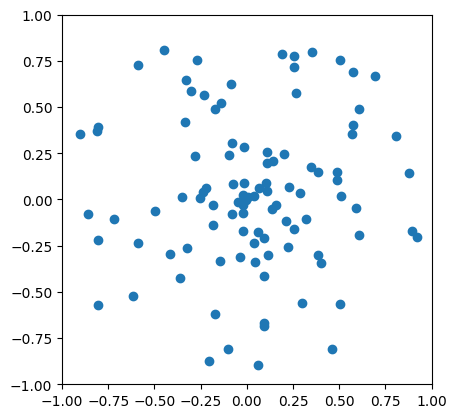

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
np.random.seed(42)
theta = np.random.uniform(0, 2*np.pi, 100)
r = np.random.uniform(0, 1, 100)

# Convert polar coordinates to Cartesian coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)

# Create a scatter plot with circular boundary
plt.scatter(x, y)

# Set aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

# Set the limits to create a circular boundary
radius = 1
plt.xlim(-radius, radius)
plt.ylim(-radius, radius)

# Display the plot
plt.show()


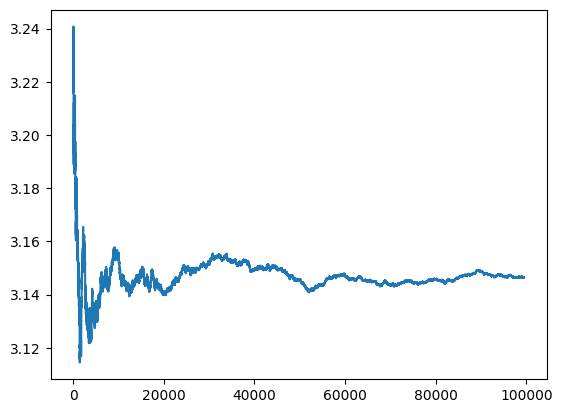

In [9]:
T = 100000
count = 0
pi_approximation = []
for t in range(T):
    x = 2 * np.random.random() - 1
    y = 2 * np.random.random() - 1
    if x**2 + y**2 <= 1:
        count = count  + 1
    pi_approximation.append([4 * count/(t + 1)])

import matplotlib.pyplot as plt
plt.plot(pi_approximation[500:])
        

In [12]:
import folium
from geopy.geocoders import Nominatim
import webbrowser

def show_state_map(state_name):
    # Initialize geocoder
    geolocator = Nominatim(user_agent="state_map_generator")

    # Geocode the state name to get its coordinates
    location = geolocator.geocode(state_name)

    if location:
        # Create a folium map centered around the state
        state_map = folium.Map(location=[location.latitude, location.longitude], zoom_start=7)

        # Add a marker for the center of the state
        folium.Marker([location.latitude, location.longitude], popup=f'Center of {state_name}').add_to(state_map)

        # Save the map as an HTML file
        filename = f"{state_name}_map.html"
        state_map.save(filename)
        
        # Open the HTML file in the default web browser
        webbrowser.open(filename)
    else:
        print(f"Could not geocode {state_name}")

if __name__ == "__main__":
    # Example usage: Pass the state name as an argument
    state_name = input("Enter the state name: ")
    show_state_map(state_name)


C:\Users\jaimo\AppData\Local\Temp\ipykernel_23628\3146978017.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


AttributeError: 'Map' object has no attribute '_build_map'

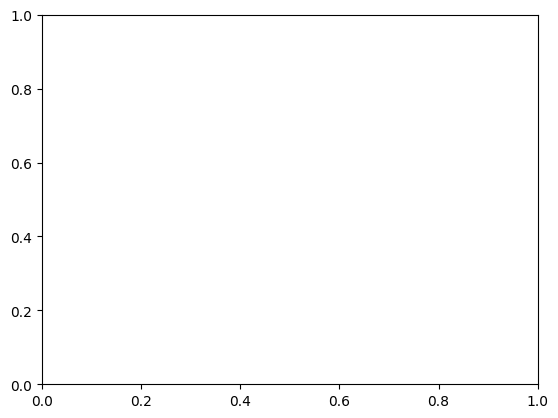

In [17]:
import folium
import geopandas as gpd
import mplleaflet
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopy.geocoders import Nominatim

def load_state_boundaries():
    # Load Natural Earth low-resolution geometries
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Extract U.S. states
    us_states = world[world['iso_a3'] == 'USA']

    return us_states

def create_static_map(state_name, state_boundaries):
    # Initialize geocoder
    geolocator = Nominatim(user_agent="state_map_generator")

    # Geocode the state name to get its coordinates
    location = geolocator.geocode(state_name)

    if location:
        # Create a folium map centered around the state
        state_map = folium.Map(location=[location.latitude, location.longitude], zoom_start=7)

        # Add a marker for the center of the state
        folium.Marker([location.latitude, location.longitude], popup=f'Center of {state_name}').add_to(state_map)

        # Add the boundaries of the state
        state_boundaries_gdf = state_boundaries[state_boundaries['name'] == state_name]
        folium.GeoJson(state_boundaries_gdf.geometry).add_to(state_map)

        # Convert the folium map to a matplotlib plot
        fig, ax = plt.subplots()
        mplleaflet.display(fig=fig, crs=state_map.crs, tiles=state_map._build_map(), close_fig=False)

        # Add the boundaries to the matplotlib plot
        state_boundaries_gdf.boundary.plot(ax=ax, color='blue', linewidth=1)

        plt.title(f"Static Map of {state_name} with Boundaries")
        plt.show()
    else:
        print(f"Could not geocode {state_name}")

if __name__ == "__main__":
    # Example usage: Pass the state name as an argument
    state_name = input("Enter the state name: ")
    
    # Load state boundaries data
    state_boundaries = load_state_boundaries()

    create_static_map(state_name, state_boundaries)


In [30]:
import folium
import geopandas as gpd
from geopy.geocoders import Nominatim

def load_state_boundaries():
    # Load Natural Earth low-resolution geometries
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Extract U.S. states
    us_states = world[world['iso_a3'] == 'USA']

    return us_states

def create_static_map(state_name, state_boundaries):
    # Initialize geocoder
    geolocator = Nominatim(user_agent="state_map_generator")

    # Geocode the state name to get its coordinates
    location = geolocator.geocode(state_name)

    if location:
        # Create a folium map centered around the state
        state_map = folium.Map(location=[location.latitude, location.longitude], zoom_start=7)

        # Add a marker for the center of the state
        folium.Marker([location.latitude, location.longitude], popup=f'Center of {state_name}').add_to(state_map)

        # Convert GeoDataFrame to GeoJSON
        state_boundaries_json = state_boundaries.to_json()

        # Add GeoJSON as a layer to the map
        folium.GeoJson(state_boundaries_json).add_to(state_map)

        # Save the map as an HTML file (optional)
        state_map.save(f"{state_name}_map.html")

        # Display the map in the default web browser
        state_map
    else:
        print(f"Could not geocode {state_name}")

if __name__ == "__main__":
    # Example usage: Pass the state name as an argument
    state_name = input("Enter the state name: ")
    
    # Load state boundaries data
    state_boundaries = load_state_boundaries()

    create_static_map(state_name, state_boundaries)


C:\Users\jaimo\AppData\Local\Temp\ipykernel_23628\1002177863.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [31]:
import geopandas as gpd
import ipyleaflet
from ipyleaflet import Map, Marker
from geopy.geocoders import Nominatim

def load_state_boundaries():
    # Load Natural Earth low-resolution geometries
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Extract U.S. states
    us_states = world[world['iso_a3'] == 'USA']

    return us_states

def create_static_map(state_name, state_boundaries):
    # Initialize geocoder
    geolocator = Nominatim(user_agent="state_map_generator")

    # Geocode the state name to get its coordinates
    location = geolocator.geocode(state_name)

    if location:
        # Create a map centered around the state
        state_map = Map(center=(location.latitude, location.longitude), zoom=7)

        # Add a marker for the center of the state
        marker = Marker(location=(location.latitude, location.longitude), title=f'Center of {state_name}')
        state_map.add_layer(marker)

        # Convert GeoDataFrame to GeoJSON
        state_boundaries_json = state_boundaries.to_json()

        # Add GeoJSON as a layer to the map
        geojson_layer = ipyleaflet.GeoJSON(data=state_boundaries_json)
        state_map.add_layer(geojson_layer)

        # Display the map
        return state_map
    else:
        print(f"Could not geocode {state_name}")

if __name__ == "__main__":
    # Example usage: Pass the state name as an argument
    state_name = input("Enter the state name: ")
    
    # Load state boundaries data
    state_boundaries = load_state_boundaries()

    # Create and display the map
    static_map = create_static_map(state_name, state_boundaries)
    static_map


C:\Users\jaimo\AppData\Local\Temp\ipykernel_23628\942090701.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


TraitError: The 'data' trait of a GeoJSON instance expected a dict, not the str '{"type": "FeatureCollection", "features": [{"id": "4", "type": "Feature", "properties": {"pop_est": 328239523.0, "continent": "North America", "name": "United States of America", "iso_a3": "USA", "gdp_md_est": 21433226}, "geometry": {"type": "MultiPolygon", "coordinates": [[[[-122.84000000000003, 49.000000000000114], [-120.0, 49.000000000000114], [-117.03121, 49.0], [-116.04818, 49.0], [-113.0, 49.0], [-110.05000000000001, 49.0], [-107.05000000000001, 49.0], [-104.04826000000003, 48.99986000000007], [-100.65000000000003, 49.000000000000114], [-97.2287200000048, 49.0007], [-95.15906950917206, 49.0], [-95.15609, 49.38425000000001], [-94.81758000000002, 49.38905], [-94.64, 48.84], [-94.32914000000001, 48.67074], [-93.63087000000002, 48.609260000000006], [-92.61000000000001, 48.44999999999993], [-91.64, 48.14], [-90.83, 48.27], [-89.60000000000002, 48.010000000000105], [-89.27291744663665, 48.01980825458281], [-88.37811418328671, 48.302917588893706], [-87.43979262330028, 47.94], [-86.46199083122826, 47.553338019392], [-85.65236324740341, 47.22021881773051], [-84.8760798815149, 46.90008331968238], [-84.77923824739992, 46.63710195574902], [-84.54374874544584, 46.538684190449146], [-84.60490000000004, 46.439599999999984], [-84.33670000000001, 46.408770000000004], [-84.1421195136734, 46.51222585711571], [-84.0918512641615, 46.27541860613826], [-83.89076534700574, 46.116926988299014], [-83.61613094759059, 46.116926988299014], [-83.46955074739469, 45.994686387712534], [-83.59285071484311, 45.81689362241252], [-82.55092464875821, 45.34751658790543], [-82.33776312543114, 44.440000000000055], [-82.13764238150395, 43.57108755143997], [-82.42999999999999, 42.980000000000004], [-82.9, 42.43], [-83.12, 42.08], [-83.14199968131264, 41.975681057292874], [-83.029810146807, 41.83279572200598], [-82.69008928092023, 41.675105088867326], [-82.4392777167916, 41.675105088867326], [-81.27774654816716, 42.209025987306816], [-80.24744767934794, 42.36619985612255], [-78.93936214874375, 42.86361135514798], [-78.92, 42.964999999999996], [-79.01, 43.27], [-79.17167355011186, 43.46633942318426], [-78.72027991404235, 43.62508942318493], [-77.7378850979577, 43.62905558936328], [-76.82003414580558, 43.628784288093755], [-76.50000000000001, 44.01845889375865], [-76.375, 44.09631], [-75.31821000000001, 44.81645], [-74.86700000000002, 45.000480000000096], [-73.34783, 45.00738], [-71.50506, 45.0082], [-71.405, 45.254999999999995], [-71.08482000000004, 45.30524000000014], [-70.66, 45.46], [-70.305, 45.915], [-69.99997, 46.69307], [-69.237216, 47.447781], [-68.90500000000003, 47.18500000000006], [-68.23444, 47.354859999999974], [-67.79046000000001, 47.066359999999996], [-67.79134, 45.70281000000001], [-67.13741, 45.13753], [-66.96465999999998, 44.809700000000134], [-68.03251999999998, 44.325199999999995], [-69.05999999999995, 43.980000000000075], [-70.11616999999995, 43.68405000000013], [-70.64547563341102, 43.09023834896402], [-70.81488999999999, 42.865299999999934], [-70.82499999999999, 42.33499999999998], [-70.49499999999995, 41.80500000000001], [-70.07999999999998, 41.78000000000003], [-70.185, 42.145000000000095], [-69.88496999999995, 41.92283000000009], [-69.96502999999996, 41.63717000000014], [-70.63999999999999, 41.47500000000002], [-71.12039000000004, 41.49445000000014], [-71.8599999999999, 41.32000000000005], [-72.29500000000002, 41.26999999999998], [-72.87643000000003, 41.220650000000035], [-73.71000000000004, 40.93110235165449], [-72.24125999999995, 41.119480000000124], [-71.94499999999988, 40.930000000000064], [-73.34499999999997, 40.63000000000005], [-73.98200000000003, 40.62799999999993], [-73.95232499999997, 40.75075000000004], [-74.25671, 40.47351000000003], [-73.96243999999996, 40.42763000000002], [-74.17838, 39.70925999999997], [-74.90603999999996, 38.93954000000002], [-74.98041, 39.19640000000004], [-75.20002, 39.248450000000105], [-75.52805000000001, 39.49850000000009], [-75.32, 38.960000000000036], [-75.07183476478986, 38.782032230179254], [-75.05672999999996, 38.40412000000009], [-75.37746999999996, 38.015510000000006], [-75.94022999999999, 37.21689000000009], [-76.03126999999995, 37.25659999999999], [-75.72204999999985, 37.93705000000011], [-76.23286999999999, 38.319214999999986], [-76.35000000000002, 39.14999999999998], [-76.54272499999996, 38.71761500000008], [-76.32933000000003, 38.08326000000005], [-76.98999793161352, 38.23999176691336], [-76.30161999999996, 37.91794499999992], [-76.25873999999999, 36.96640000000008], [-75.97179999999997, 36.89726000000002], [-75.8680399999999, 36.55125000000004], [-75.72748999999999, 35.55074000000013], [-76.36318, 34.80854000000011], [-77.39763499999992, 34.512009999999975], [-78.05496, 33.92547000000002], [-78.55434999999989, 33.86133000000012], [-79.06067000000002, 33.493949999999984], [-79.20357000000001, 33.158390000000054], [-80.30132499999996, 32.509355000000085], [-80.86498, 32.033300000000054], [-81.33629000000002, 31.44049000000001], [-81.49041999999997, 30.7299900000001], [-81.31371000000001, 30.035520000000076], [-80.97999999999996, 29.18000000000012], [-80.53558499999991, 28.472129999999993], [-80.52999999999986, 28.040000000000077], [-80.05653928497759, 26.88000000000011], [-80.08801499999998, 26.205764999999985], [-80.13155999999992, 25.816775000000064], [-80.38103000000001, 25.20616000000001], [-80.67999999999995, 25.08000000000004], [-81.17212999999998, 25.201260000000104], [-81.33000000000004, 25.639999999999986], [-81.70999999999987, 25.870000000000005], [-82.23999999999995, 26.730000000000132], [-82.70515, 27.495040000000074], [-82.85525999999999, 27.886240000000043], [-82.64999999999998, 28.550000000000125], [-82.92999999999995, 29.10000000000008], [-83.70958999999999, 29.936560000000043], [-84.09999999999997, 30.09000000000009], [-85.10881999999998, 29.636150000000043], [-85.28784000000002, 29.68612000000013], [-85.7731, 30.152610000000095], [-86.39999999999992, 30.40000000000009], [-87.53035999999992, 30.27433000000002], [-88.41781999999995, 30.384900000000016], [-89.1804899999999, 30.315980000000025], [-89.5938311784198, 30.159994004836847], [-89.41373499999997, 29.89418999999998], [-89.43, 29.488639999999975], [-89.21767, 29.291080000000022], [-89.40822999999995, 29.159610000000043], [-89.77927999999997, 29.307140000000118], [-90.15463, 29.11743000000007], [-90.88022499999994, 29.148535000000095], [-91.62678499999993, 29.677000000000135], [-92.49905999999999, 29.552300000000002], [-93.22636999999997, 29.783750000000055], [-93.84841999999998, 29.71363000000008], [-94.69, 29.480000000000132], [-95.60025999999999, 28.738630000000057], [-96.59403999999995, 28.307480000000055], [-97.13999999999987, 27.83000000000004], [-97.36999999999995, 27.380000000000052], [-97.37999999999994, 26.690000000000055], [-97.32999999999998, 26.210000000000093], [-97.13999999999987, 25.870000000000005], [-97.52999999999992, 25.84000000000009], [-98.23999999999995, 26.06000000000006], [-99.01999999999992, 26.37000000000006], [-99.30000000000001, 26.840000000000032], [-99.51999999999992, 27.54000000000002], [-100.10999999999996, 28.110000000000127], [-100.45584000000002, 28.69612000000012], [-100.95759999999996, 29.380710000000136], [-101.66239999999999, 29.77930000000009], [-102.48000000000002, 29.75999999999999], [-103.11000000000001, 28.970000000000027], [-103.94, 29.27000000000004], [-104.4569699999999, 29.571960000000047], [-104.70574999999997, 30.121730000000014], [-105.03737000000001, 30.644019999999955], [-105.63159000000002, 31.08383000000009], [-106.1429, 31.399950000000047], [-106.50758999999988, 31.754520000000014], [-108.24000000000001, 31.754853718166373], [-108.24193999999994, 31.342220000000054], [-109.03500000000003, 31.341940000000136], [-111.02361000000002, 31.334719999999948], [-113.30498, 32.03914000000009], [-114.815, 32.52528000000001], [-114.72138999999993, 32.72082999999992], [-115.99134999999995, 32.61239000000012], [-117.12775999999985, 32.53533999999996], [-117.29593769127393, 33.04622461520387], [-117.94400000000002, 33.621236431201396], [-118.41060227589753, 33.74090922312445], [-118.51989482279976, 34.02778157757575], [-119.08100000000002, 34.07799999999992], [-119.43884064201671, 34.34847717828427], [-120.36777999999998, 34.447110000000066], [-120.62286, 34.60854999999998], [-120.74432999999999, 35.15686000000011], [-121.71456999999992, 36.161529999999914], [-122.54746999999998, 37.551760000000115], [-122.51201000000003, 37.78339000000011], [-122.95319, 38.11371000000008], [-123.72720000000004, 38.95166000000012], [-123.86516999999998, 39.76699000000008], [-124.39807000000002, 40.313199999999995], [-124.17885999999999, 41.142020000000116], [-124.21370000000002, 41.99964000000011], [-124.53283999999996, 42.7659900000001], [-124.14213999999998, 43.708380000000034], [-124.020535, 44.615894999999966], [-123.89892999999995, 45.52341000000007], [-124.079635, 46.864750000000015], [-124.39566999999994, 47.72017000000011], [-124.68721008300781, 48.18443298339855], [-124.56610107421875, 48.37971496582037], [-123.12, 48.04000000000002], [-122.58735999999993, 47.09600000000006], [-122.34000000000003, 47.360000000000014], [-122.5, 48.180000000000064], [-122.84000000000003, 49.000000000000114]]], [[[-155.40214, 20.07975], [-155.22452, 19.99302], [-155.06226, 19.8591], [-154.80741, 19.50871], [-154.83147, 19.453280000000003], [-155.22217, 19.23972], [-155.54211, 19.08348], [-155.68817, 18.91619], [-155.93665, 19.05939], [-155.90806, 19.33888], [-156.07347000000001, 19.70294], [-156.02368, 19.81422], [-155.85008000000002, 19.97729], [-155.91907, 20.17395], [-155.86108000000002, 20.267210000000002], [-155.78505, 20.2487], [-155.40214, 20.07975]]], [[[-155.99566000000002, 20.76404], [-156.07926, 20.643970000000003], [-156.41445, 20.57241], [-156.58673, 20.783], [-156.70167, 20.8643], [-156.71054999999998, 20.92676], [-156.61258, 21.01249], [-156.25711, 20.917450000000002], [-155.99566000000002, 20.76404]]], [[[-156.75824, 21.176840000000002], [-156.78933, 21.068730000000002], [-157.32521, 21.097770000000004], [-157.25027, 21.219579999999997], [-156.75824, 21.176840000000002]]], [[[-158.0252, 21.71696], [-157.94161, 21.65272], [-157.65283000000002, 21.322170000000003], [-157.70703, 21.26442], [-157.7786, 21.27729], [-158.12667000000002, 21.31244], [-158.2538, 21.53919], [-158.29265, 21.57912], [-158.0252, 21.71696]]], [[[-159.36569, 22.21494], [-159.34512, 21.982000000000003], [-159.46372, 21.88299], [-159.80051, 22.065330000000003], [-159.74877, 22.1382], [-159.5962, 22.236179999999997], [-159.36569, 22.21494]]], [[[-166.46779212142462, 60.384169826897754], [-165.67442969466364, 60.29360687930625], [-165.57916419173358, 59.90998688418753], [-166.19277014876727, 59.75444082298899], [-166.84833736882197, 59.941406155020985], [-167.45527706609008, 60.21306915957936], [-166.46779212142462, 60.384169826897754]]], [[[-153.22872941792113, 57.96896841087248], [-152.56479061583514, 57.901427313866996], [-152.1411472239064, 57.591058661522], [-153.00631405333692, 57.11584219016593], [-154.0050902984581, 56.734676825581076], [-154.51640275777004, 56.99274892844669], [-154.67099280497118, 57.46119578717253], [-153.7627795074415, 57.81657461204373], [-153.22872941792113, 57.96896841087248]]], [[[-140.98598761037601, 69.71199839952635], [-140.986, 69.712], [-140.9925, 66.00003000000001], [-140.99778, 60.30639000000001], [-140.013, 60.27682000000001], [-139.03900000000002, 60.0], [-138.34089, 59.562110000000004], [-137.4525, 58.905], [-136.47972000000004, 59.46389000000005], [-135.47583, 59.787780000000005], [-134.94500000000005, 59.2705600000001], [-134.27111000000002, 58.86111000000005], [-133.35556000000003, 58.41028000000001], [-132.73042, 57.692890000000006], [-131.70781, 56.55212], [-130.00778000000003, 55.915830000000085], [-129.98, 55.285000000000004], [-130.53611, 54.802780000000006], [-130.53610895273684, 54.80275447679924], [-130.5361101894673, 54.8027534043494], [-131.08581823797215, 55.17890615500204], [-131.9672114671423, 55.497775580459006], [-132.2500107428595, 56.3699962428974], [-133.53918108435641, 57.17888743756214], [-134.07806292029608, 58.12306753196691], [-135.0382110322791, 58.18771474876394], [-136.62806230995471, 58.21220937767043], [-137.800006279686, 58.49999542910376], [-139.867787041413, 59.53776154238915], [-140.825273817133, 59.727517401765056], [-142.57444353556446, 60.08444651960497], [-143.9588809948799, 59.999180406323376], [-145.92555681682788, 60.45860972761426], [-147.11437394914665, 60.884656073644635], [-148.22430620012761, 60.67298940697714], [-148.01806555885082, 59.97832896589364], [-148.57082251686086, 59.914172675203304], [-149.72785783587585, 59.70565827090553], [-150.60824337461642, 59.368211168039466], [-151.7163927886833, 59.15582103131993], [-151.85943315326722, 59.744984035879554], [-151.40971900124717, 60.72580272077937], [-150.3469414947325, 61.03358755150987], [-150.62111080625704, 61.2844249538544], [-151.89583919981683, 60.727197984451266], [-152.57832984109558, 60.061657212964235], [-154.01917212625764, 59.35027944603428], [-153.28751135965317, 58.86472768821977], [-154.23249243875847, 58.14637360293051], [-155.3074914215102, 57.727794501366304], [-156.30833472392305, 57.422774359763594], [-156.55609737854638, 56.97998484967064], [-158.11721655986779, 56.46360809999419], [-158.43332129619714, 55.99415355083852], [-159.60332739971741, 55.56668610292013], [-160.28971961163427, 55.643580634170576], [-161.22304765525777, 55.364734605523495], [-162.23776607974105, 55.02418691672011], [-163.06944658104638, 54.68973704692712], [-164.78556922102717, 54.40417308208214], [-164.94222632552007, 54.57222483989534], [-163.84833960676565, 55.03943146424609], [-162.87000139061595, 55.34804311789321], [-161.80417497459607, 55.89498647727038], [-160.5636047027812, 56.00805451112501], [-160.07055986228448, 56.41805532492873], [-158.6844429189195, 57.01667511659787], [-158.46109737855403, 57.21692129172885], [-157.72277035218391, 57.57000051536306], [-157.55027442119362, 58.328326321030204], [-157.04167497457698, 58.91888458926172], [-158.19473120830554, 58.61580231386978], [-158.51721798402303, 58.78778148053732], [-159.0586061269288, 58.42418610293163], [-159.71166704001737, 58.93139028587632], [-159.98128882550017, 58.572549140041644], [-160.3552711659965, 59.07112335879361], [-161.3550034251151, 58.670837714260756], [-161.96889360252632, 58.67166453717738], [-162.05498653872465, 59.26692536074745], [-161.8741707021354, 59.63362132429057], [-162.51805904849212, 59.98972361921386], [-163.8183414378202, 59.79805573184336], [-164.66221757714652, 60.26748444278263], [-165.3463877024748, 60.50749563256238], [-165.3508318756519, 61.073895168697504], [-166.12137915755602, 61.50001902937623], [-165.73445187077058, 62.074996853271784], [-164.9191786367179, 62.63307648380794], [-164.56250790103934, 63.14637848576302], [-163.75333248599708, 63.21944896102377], [-163.06722449445786, 63.05945872664802], [-162.26055538638175, 63.54193573674115], [-161.53444983624863, 63.455816962326764], [-160.7725066803211, 63.766108100023246], [-160.9583351308426, 64.22279857040274], [-161.51806840721218, 64.40278758407527], [-160.77777767641481, 64.78860382756642], [-161.39192623598765, 64.77723501246231], [-162.4530500966689, 64.55944468856819], [-162.75778601789415, 64.33860545516876], [-163.54639421288428, 64.5591604681905], [-164.96082984114514, 64.44694509546883], [-166.42528825586447, 64.68667206487066], [-166.8450042389391, 65.08889557561452], [-168.11056006576715, 65.66999705673675], [-166.70527116602193, 66.08831777613938], [-164.47470964257548, 66.5766600612975], [-163.65251176659564, 66.5766600612975], [-163.78860165103623, 66.07720734319668], [-161.67777442121013, 66.11611969671242], [-162.48971452538004, 66.73556509059512], [-163.71971696679117, 67.11639455837008], [-164.4309913808565, 67.61633820257777], [-165.39028683170673, 68.04277212185025], [-166.76444068099605, 68.35887685817966], [-166.20470740462667, 68.88303091091615], [-164.43081051334346, 68.91553538682774], [-163.1686136546145, 69.37111481391287], [-162.930566169262, 69.85806183539927], [-161.90889726463556, 70.33332998318764], [-160.93479651593367, 70.44768992784958], [-159.03917578838713, 70.89164215766891], [-158.11972286683394, 70.82472117785102], [-156.58082455139808, 71.35776357694175], [-155.06779029032427, 71.14777639432367], [-154.3441652089412, 70.69640859647018], [-153.9000062733926, 70.88998851183567], [-152.21000606993528, 70.82999217394485], [-152.27000240782613, 70.60000621202983], [-150.73999243874448, 70.43001658800569], [-149.7200030181675, 70.53001048449045], [-147.61336157935705, 70.2140349392418], [-145.68998980022533, 70.12000967068673], [-144.9200109590764, 69.98999176704046], [-143.58944618042523, 70.15251414659832], [-142.07251034871348, 69.85193817817265], [-140.98598752156073, 69.71199839952635], [-140.98598761037601, 69.71199839952635]]], [[[-171.73165686753944, 63.782515367275934], [-171.1144335602453, 63.59219106714495], [-170.4911124339407, 63.694975490973505], [-169.6825054596536, 63.43111562769119], [-168.6894394603007, 63.297506212000556], [-168.77194088445466, 63.18859813094544], [-169.5294398672051, 62.97693146427792], [-170.29055620021595, 63.194437567794424], [-170.67138566799093, 63.3758218451389], [-171.55306311753873, 63.317789211675105], [-171.79111060289122, 63.40584585230046], [-171.73165686753944, 63.782515367275934]]]]}}]}'.

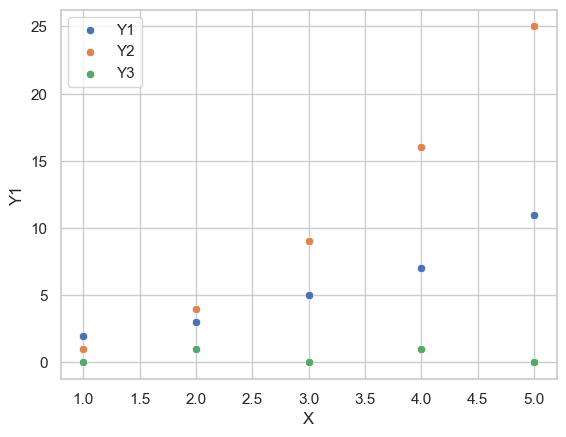

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'X': [1, 2, 3, 4, 5],
    'Y1': [2, 3, 5, 7, 11],
    'Y2': [1, 4, 9, 16, 25],
    'Y3': [0, 1, 0, 1, 0]
}

# Create a DataFrame from the data
import pandas as pd
df = pd.DataFrame(data)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with automatic marker shapes and colors
sns.scatterplot(data=df, x='X', y='Y1', label='Y1')
sns.scatterplot(data=df, x='X', y='Y2', label='Y2')
sns.scatterplot(data=df, x='X', y='Y3', label='Y3')

# Show the plot
plt.legend()
plt.show()


In [3]:
import plotly.express as px
import pandas as pd

# Sample data
data = {
    'X': [1, 2, 3, 4, 5],
    'Y1': [2, 3, 5, 7, 11],
    'Y2': [1, 4, 9, 16, 25],
    'Y3': [0, 1, 0, 1, 0],
    'group': ['Group1', 'Group2', 'Group3', 'Group2', 'Group1']
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Create a scatter plot with automatic marker shapes and colors
fig = px.scatter(df, x='X', y='Y1', color='group', symbol='group', size='Y1',
                 title='Scatter Plot with Automatic Marker Shapes and Colors',
                 labels={'Y1': 'Y-axis label', 'X': 'X-axis label'},
                 hover_data=['X', 'Y1', 'group'])

# Show the plot
fig.show()


In [7]:
import streamlit as st
import plotly.express as px
import pandas as pd

# Sample data
data = {
    'X': [1, 2, 3, 4, 5],
    'Y1': [2, 3, 5, 7, 11],
    'Y2': [1, 4, 9, 16, 25],
    'Y3': [0, 1, 0, 1, 0],
    'group': ['Group1', 'Group2', 'Group1', 'Group2', 'Group1']
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# List of custom colors for each group
custom_colors = ['#FF5733', '#33FF57']

# Create a scatter plot with custom marker shapes and colors
fig = px.scatter(df, x='X', y='Y1', color='group', symbol='group', size='Y1',
                 color_discrete_sequence=custom_colors,
                 title='Scatter Plot with Custom Colors and Aspect Ratio',
                 labels={'Y1': 'Y-axis label', 'X': 'X-axis label'},
                 hover_data=['X', 'Y1', 'group'])

# Set the aspect ratio (height to width ratio)
aspect_ratio = 0.7  # Adjust as needed

# Calculate width based on desired height and aspect ratio
height = 400  # Specify your desired height
width = int(height / aspect_ratio)

# Update layout with calculated width
fig.update_layout(width=width)

# Set x and y axis ranges
x_range = [df['X'].min() - 0.1, df['X'].max() + 0.1]
y_range = [df['Y1'].min() - 0.1, df['Y1'].max() + 0.1]

fig.update_layout(xaxis=dict(range=x_range), yaxis=dict(range=y_range))
fig.show()


In [1]:
import requests
import json

def download_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for any HTTP errors

        # Parse the JSON data
        data = response.json()

        return data

    except requests.exceptions.RequestException as e:
        print(f"Error downloading data: {e}")
        return None

if __name__ == "__main__":
    url = "https://services1.arcgis.com/Hp6G80Pky0om7QvQ/arcgis/rest/services/Pharmacies/FeatureServer/0"

    data = download_data(url)

    if data:
        # Save the data to a file (optional)
        with open("pharmacies_data.json", "w") as file:
            json.dump(data, file, indent=2)

        print("Data downloaded successfully.")
    else:
        print("Failed to download data.")


Error downloading data: Expecting value: line 1 column 1 (char 0)
Failed to download data.


In [ ]:
import json
data = json.load(open("pharmacies_data.json"))